In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
import re

In [2]:
df=pd.read_csv("토픽1.csv")
df

,Unnamed: 0,별점,리뷰 내용
0,0,5,Seoul tower is very peacfull and one of clean ...
1,11,5,1 point worth going when visiting Seoul
2,12,5,Namsan Seoul Tower was built in 1969 as Koreas...
3,16,5,Aju joa
4,29,2,Visiting this place in the summer is a huge mi...
...,...,...,...
3637,15450,1,Good
3638,15451,4,Ive been there for the first time but it was ...
3639,15452,5,Not
3640,15454,5,Very beautiful


In [3]:
review=[]
for i in df['리뷰 내용']:
    i=i.lower()
    review.append(i)

df['리뷰 내용']=review
df

,Unnamed: 0,별점,리뷰 내용
0,0,5,seoul tower is very peacfull and one of clean ...
1,11,5,1 point worth going when visiting seoul
2,12,5,namsan seoul tower was built in 1969 as koreas...
3,16,5,aju joa
4,29,2,visiting this place in the summer is a huge mi...
...,...,...,...
3637,15450,1,good
3638,15451,4,ive been there for the first time but it was ...
3639,15452,5,not
3640,15454,5,very beautiful


In [20]:
keyword=input("키워드 입력 : ")
df_a = df[df['리뷰 내용'].str.contains(keyword)]
for i in df_a['리뷰 내용']:
    print("="*100)
    print(i)

키워드 입력 : line
visiting this place in the summer is a huge mistake lines were unbelievably long and slow ive never seen such a long line and was forced to stand in it because no i dont want to go down walking in a 200 stairs in the summer and i paid a rounded ticket
visited this place before but didnt appreciated it much because too many people and long lines but this visit is so magical 10am just about it opens you can appreciate the place and better view weather also cooperated bright and clear sky even at a very cold temperature of 4c
to be honest i found this tower to be way too touristy we went there in the evening to enjoy the lights of seoul but we were kind of disappointed you have to wait in line for quite a while to take the elevators to the observation deck of the tower and when you eventually get up the reflections of the candy and souvenir shops in the tower spoil the view you can buy and write postcards that get stamped in the tower itself but the view is better when you s

In [21]:
df_a

,Unnamed: 0,별점,리뷰 내용
4,29,2,visiting this place in the summer is a huge mi...
80,395,5,visited this place before but didnt appreciate...
92,494,2,to be honest i found this tower to be way too ...
116,654,2,sad impressions from the observation place wit...
117,666,5,i usually shy from expensive tower attractions...
...,...,...,...
3219,14142,5,this is one of the best aquariums i have been ...
3257,14211,4,coex isnt just all fish no they have a small j...
3277,14251,4,i had some free time and decided to go check o...
3298,14301,5,the ginseng chicken they served taste really g...


In [22]:
#불용어 추가
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't"]
for word in add_stop_words:
    stop_words.add(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
text = df_a[['리뷰 내용']]
text

,리뷰 내용
4,visiting this place in the summer is a huge mi...
80,visited this place before but didnt appreciate...
92,to be honest i found this tower to be way too ...
116,sad impressions from the observation place wit...
117,i usually shy from expensive tower attractions...
...,...
3219,this is one of the best aquariums i have been ...
3257,coex isnt just all fish no they have a small j...
3277,i had some free time and decided to go check o...
3298,the ginseng chicken they served taste really g...


mistake    line             1
line       unbelievably     1
long       line            30
line       force            1
           visit            2
wait       line            25
line       quite            4
intervals  line             2
line       queue            2
bad        line             2
line       10               2
get        line             3
line       cable            2
           get              7
           elevator         2
dtype: int64


Text(0.5, 0, '# of Occurances')

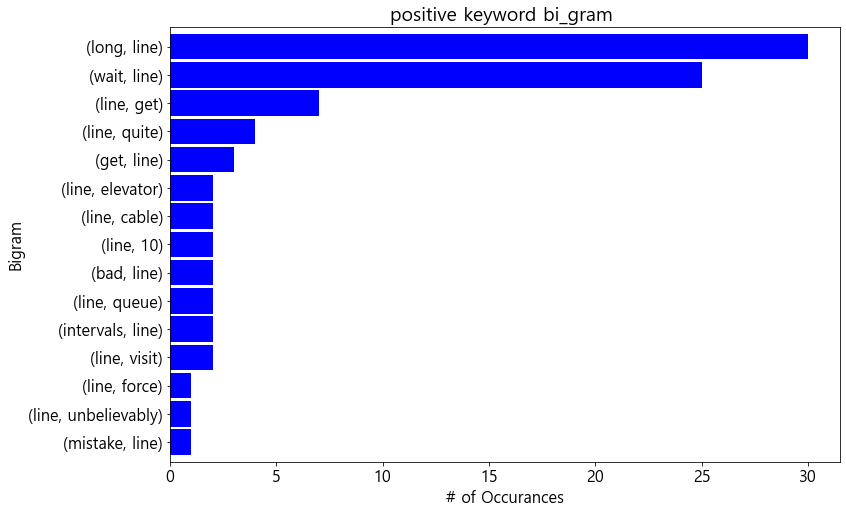

In [26]:
from nltk.stem import WordNetLemmatizer
text = df_a[['리뷰 내용']]
new=pd.Series()
kw=[]
keyword='line'
text_arr=[[]for i in range(len(df_a['리뷰 내용']))]
#토큰화
text['리뷰 내용'] = text.apply(lambda row: nltk.word_tokenize(row['리뷰 내용']), axis=1)

#불용어 처리
text['리뷰 내용'] = text['리뷰 내용'].apply(lambda x: [word.lower() for word in x])
text['리뷰 내용'] = text['리뷰 내용'].apply(lambda x: [word for word in x if word not in (stop_words)])

#표제어 추출
text['리뷰 내용'] = text['리뷰 내용'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
    
#길이가 3이하인 단어에 대해서 제거하는 작업을 수행
tokenized_doc = text['리뷰 내용'].apply(lambda x : [word for word in x if len(word) > 3])

#바이그램

for i in text.index:
    wordnet=pd.Series(nltk.ngrams(text['리뷰 내용'][i], 2))
    num=0
    for j in wordnet:
        if wordnet[num][0]==keyword or wordnet[num][1]==keyword:
            kw.append(wordnet[num])
        num+=1
            
from collections import Counter
k=pd.Series(Counter(kw))[:15]
#kw.value_counts()[:12]
print(k)

k.sort_values().plot.barh(color='blue', width=0.9, figsize=(12, 8))
plt.title('positive keyword bi_gram ')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')


#walk의 경우 'walk around'로 인해 나타나는 around를 제외하면 lik, good, heal과 같이 나타나는 경우가 많다. 긍정으로 보임

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
num=0
nump=0
numn=0
n=0
for i in df_a['리뷰 내용']:
    score=sia.polarity_scores(i)
    compound=score['compound']
    print(score)
    if compound<0:
        numn+=1
        num-=1
        print(num)
    elif compound>0:
        num+=1
        nump+=1
        print(num)
    elif compound==0:
        n+=1
        num=num
        print(num)
print("긍정 : ",nump," 부정 : ",numn," 중립 : ",n)
if num>0:
    pn='긍정'
elif num<0:
    pn='부정'
elif num==0:
    pn='중립'
print("=================================================")      
print("리뷰 개수 : " ,len(df_a['리뷰 내용']))
print("최종 점수 : ", num)
print(keyword," : ",pn)

{'neg': 0.169, 'neu': 0.787, 'pos': 0.044, 'compound': -0.6728}
-1
{'neg': 0.057, 'neu': 0.707, 'pos': 0.236, 'compound': 0.9021}
0
{'neg': 0.061, 'neu': 0.864, 'pos': 0.075, 'compound': 0.1309}
1
{'neg': 0.247, 'neu': 0.621, 'pos': 0.133, 'compound': -0.6176}
0
{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'compound': 0.4046}
1
{'neg': 0.037, 'neu': 0.79, 'pos': 0.173, 'compound': 0.796}
2
{'neg': 0.047, 'neu': 0.876, 'pos': 0.077, 'compound': 0.7815}
3
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.9878}
4
{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'compound': 0.4111}
5
{'neg': 0.061, 'neu': 0.864, 'pos': 0.075, 'compound': 0.1309}
6
{'neg': 0.247, 'neu': 0.621, 'pos': 0.133, 'compound': -0.6176}
5
{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'compound': 0.4046}
6
{'neg': 0.013, 'neu': 0.895, 'pos': 0.092, 'compound': 0.9571}
7
{'neg': 0.062, 'neu': 0.812, 'pos': 0.126, 'compound': 0.3182}
8
{'neg': 0.097, 'neu': 0.809, 'pos': 0.094, 'compound': -0.3298}
7
{'neg': 0.069, 'neu': 0.701,

Text(0.5, 1.0, 'line')

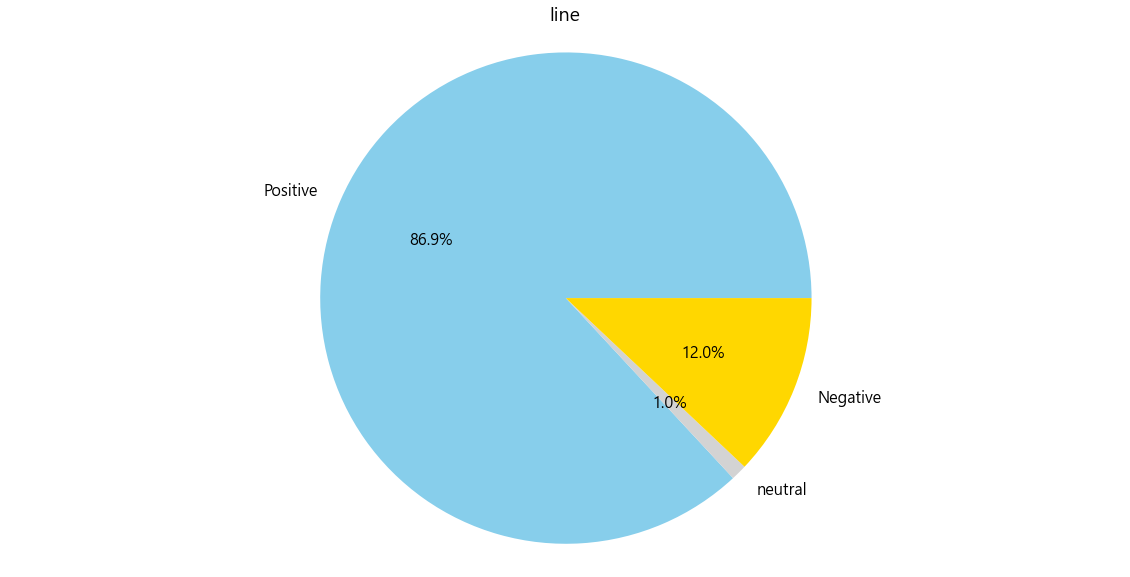

In [29]:
group_size=[nump,n,numn]
group_names=['Positive','neutral','Negative']
colors=['skyblue','lightgrey','gold']
explode=[0.05,0.05,0.05]
plt.pie(group_size,labels=group_names,autopct='%.1f%%',colors=colors)
plt.axis('equal')
plt.title(keyword)